<a href="https://colab.research.google.com/github/sheetaldighe/Garment_Worker_Performance/blob/main/group_3_project_regression_garments_worker_productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries


In [ ]:
# importting the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy
from sklearn.metrics import r2_score , mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
Path = "/content/drive/MyDrive/garments_worker_productivity 2 (2).csv"


In [ ]:
df = pd.read_csv(Path, index_col= False)

In [ ]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
# checking the rows and columns of thte dataset
df.shape

(1197, 15)

<ipython-input-7-3e5099b80ef3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


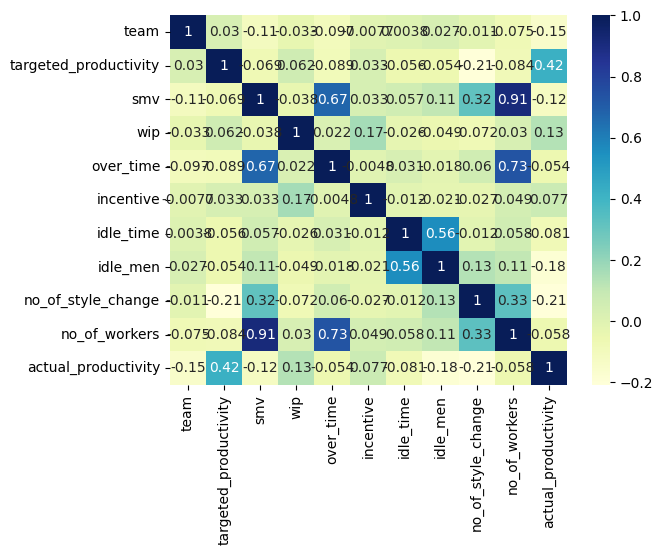

In [ ]:
corrplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

DATA PREPROCESSING

In [ ]:
# info about the data, this can also show us whether there are nan values and how many they are
# df.info()

In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
# This code gives us the column in the datset
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:

#Changing the date to real date_time object
df.date = pd.to_datetime(df.date)

In [ ]:
# Renaming some columns to a readable column
df = df.rename(columns = { "wip" :"work_in_progress",
        "smv":  "standard_minute_value" })

In [ ]:
# handled the missing data by filling the missing  values with median
df.work_in_progress = df.work_in_progress.fillna(df.work_in_progress.median())

We are still in Data Precessing , so we will be checking some columns to see if there are issues and we will rectify them

In [ ]:
df.department.unique()    # we see an issue with this and we are rectifying below

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [ ]:
df.department = df.department.replace(to_replace = "finishing " , value = "finishing")
df.department = df.department.replace(to_replace = "sweing" , value = "sewing")  # There was a aspelling error so we fixed it

In [ ]:
# df.isnull().sum()

In [ ]:
df.department.unique()   # confirmed if the code fixed the problem ----- This is optional

array(['sewing', 'finishing'], dtype=object)

In [ ]:
# This gives us te statistical summary of our dataset
# df.describe().transpose()

In [ ]:
# Changing the weekdays as 1 and weekends as 0

df.day = df.day.replace({"Wednesday" : 1,"Tuesday": 1,"Thursday": 1,"Monday": 1
                         , "Sunday" : 0, "Saturday" : 0})

In [ ]:
df.day.unique()    # This  is optional

array([1, 0])

In [ ]:
df.dtypes   # Here we see the type of each columns and we see that the columns are the right way
#            # but we still fo further to change some

date                     datetime64[ns]
quarter                          object
department                       object
day                               int64
team                              int64
targeted_productivity           float64
standard_minute_value           float64
work_in_progress                float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object

**EDA**

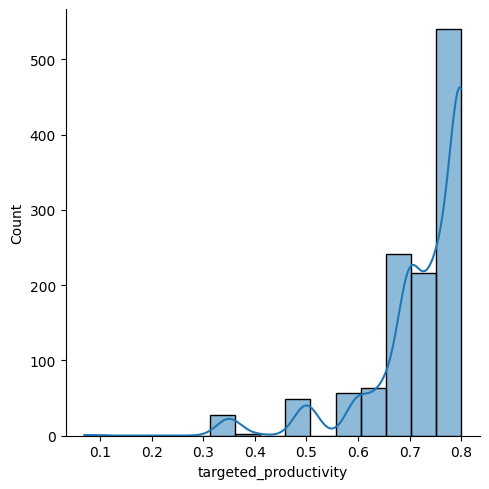

In [ ]:
sb.displot(data = df, x= "targeted_productivity" , bins = 15 , kde = True);   # semi colon is to not show the necessary information

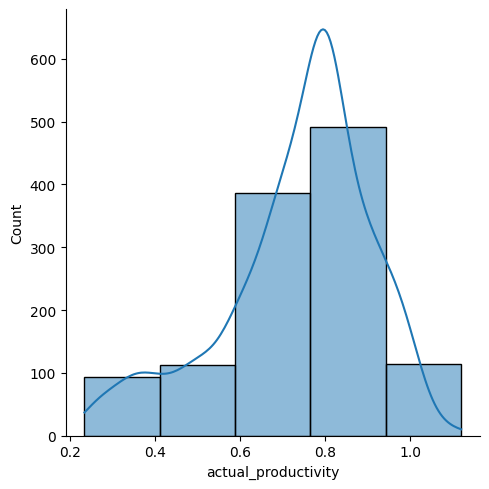

In [ ]:
sb.displot(data = df , x = "actual_productivity", bins = 5, kde = True);

In [ ]:
fig = px.box(df, y = "actual_productivity" , x = "department")
fig.show()
# So we see the the precise value of the outlier in the actual_productivity column

In [ ]:
# # Removing the outlier
# df = df[df["actual_productivity"] > 0.49]


We did not remove the whole outlier due to the less number of our dataset -- we had originally 1197 total dataset and if we remove the total outlier , it will affect our machine learning model when training

In [ ]:
fig = px.box(df, y = "actual_productivity" , x = "department")
fig.show()

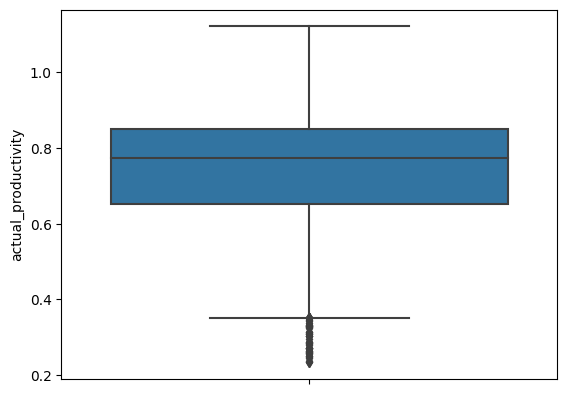

In [ ]:
sb.boxplot(y = "actual_productivity" , data = df);

In [ ]:
# df.columns

In [ ]:

# Define a mapping from departments to numeric values
department_mapping = {
    'sewing': 1,
    'finishing': 2,
}

df['department'] = df['department'].map(department_mapping)

In [ ]:
Quarter = pd.get_dummies(df["quarter"] )
df = pd.concat([df , Quarter], axis =1)

In [ ]:
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [ ]:
Quarter

,Quarter1,Quarter2,Quarter3,Quarter4,Quarter5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1192,0,1,0,0,0
1193,0,1,0,0,0
1194,0,1,0,0,0
1195,0,1,0,0,0


In [ ]:
df.shape

(1197, 20)

In [ ]:
df.head(4)

,date,quarter,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Quarter1,Quarter2,Quarter3,Quarter4,Quarter5
0,2015-01-01,Quarter1,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,0
1,2015-01-01,Quarter1,2,1,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0
2,2015-01-01,Quarter1,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0
3,2015-01-01,Quarter1,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0


In [ ]:
df = df.drop(["quarter" , "date"] ,axis =1)

In [ ]:
df

,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Quarter1,Quarter2,Quarter3,Quarter4,Quarter5
0,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,0
1,2,1,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0
2,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0
3,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0
4,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,1,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333,0,1,0,0,0
1193,2,1,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625,0,1,0,0,0
1194,2,1,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625,0,1,0,0,0
1195,2,1,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889,0,1,0,0,0


In [ ]:
df.dtypes

department                 int64
day                        int64
team                       int64
targeted_productivity    float64
standard_minute_value    float64
work_in_progress         float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
Quarter1                   uint8
Quarter2                   uint8
Quarter3                   uint8
Quarter4                   uint8
Quarter5                   uint8
dtype: object

In [ ]:
df.isnull().sum()

department               0
day                      0
team                     0
targeted_productivity    0
standard_minute_value    0
work_in_progress         0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
Quarter1                 0
Quarter2                 0
Quarter3                 0
Quarter4                 0
Quarter5                 0
dtype: int64

In [ ]:
X = df.drop(["actual_productivity"] , axis =1)
Y = df["actual_productivity"]

In [ ]:
df.columns

Index(['department', 'day', 'team', 'targeted_productivity',
       'standard_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4',
       'Quarter5'],
      dtype='object')

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(0.98)   # retain 98% of useful features
# X_pca = pca.fit_transform(X)
# X_pca.shape

In [ ]:
df.columns

Index(['department', 'day', 'team', 'targeted_productivity',
       'standard_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4',
       'Quarter5'],
      dtype='object')

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.20)

In [ ]:
X_train


,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Quarter1,Quarter2,Quarter3,Quarter4,Quarter5
48,1,0,4,0.80,28.08,878.0,4260,50,0.0,0,0,55.5,1,0,0,0,0
19,2,0,4,0.80,4.15,1039.0,6600,0,0.0,0,0,20.0,1,0,0,0,0
316,1,0,1,0.80,49.10,1381.0,10350,24,0.0,0,0,57.5,0,0,1,0,0
991,1,0,9,0.75,18.79,895.0,6240,34,0.0,0,0,52.0,1,0,0,0,0
39,2,0,7,0.80,3.94,1039.0,960,0,0.0,0,0,8.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,0,10,0.70,21.82,1393.0,5640,30,0.0,0,0,52.0,1,0,0,0,0
1156,1,1,4,0.75,26.82,1104.0,5880,65,0.0,0,0,59.0,0,1,0,0,0
1015,1,1,6,0.75,18.79,947.0,2880,34,0.0,0,0,33.0,1,0,0,0,0
414,1,0,8,0.35,15.09,1448.0,9360,23,0.0,0,0,52.0,0,0,0,1,0


In [ ]:
Y_train

48      0.800598
19      0.988025
316     0.403242
991     0.750396
39      0.625313
          ...   
993     0.700237
1156    0.850084
1015    0.750797
414     0.349990
1194    0.625625
Name: actual_productivity, Length: 957, dtype: float64

Linear Regressor

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, Y_train)
Y_pred = lrmodel.predict(X_test)
mae = mean_absolute_error(Y_pred, Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.11351837941416111
mse = 0.025192845640267136


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.25)
lrmodel = LinearRegression()
lrmodel.fit(X_train, Y_train)
Y_pred = lrmodel.predict(X_test)
mae = mean_absolute_error(Y_pred, Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.10343933358324321
mse = 0.020738936840156444


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.30)
lrmodel = LinearRegression()
lrmodel.fit(X_train, Y_train)
Y_pred = lrmodel.predict(X_test)
mae = mean_absolute_error(Y_pred, Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.10189225264636702
mse = 0.019985015155800992


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.35)
lrmodel = LinearRegression()
lrmodel.fit(X_train, Y_train)
Y_pred = lrmodel.predict(X_test)
mae = mean_absolute_error(Y_pred, Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.10883258914502238
mse = 0.021447670465546412


Decision Tree Regressor

In [ ]:
d_reg = DecisionTreeRegressor()
d_reg.fit(X_train,Y_train)
Y_pred = d_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.09305682181384249
mse = 0.02342941303989847


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.25)
d_reg = DecisionTreeRegressor()
d_reg.fit(X_train,Y_train)
Y_pred = d_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.08213200909861113
mse = 0.020573664390537785


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.30)
d_reg = DecisionTreeRegressor()
d_reg.fit(X_train,Y_train)
Y_pred = d_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.09409316947268519
mse = 0.025991788411543135


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.35)
d_reg = DecisionTreeRegressor()
d_reg.fit(X_train,Y_train)
Y_pred = d_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.09881940373906126
mse = 0.028922952148366397


Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.0776579676340496
mse = 0.01570121770338763


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.25)
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.07842874889803038
mse = 0.015371831078088623


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.30)
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.07269489695811261
mse = 0.014896423140963603


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.35)
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.07462120909869058
mse = 0.015596585712152665


Support vector Regressor

In [ ]:
from sklearn.svm import SVR
s_reg = SVR()
s_reg.fit(X_train,Y_train)
Y_pred = s_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.13424446904220322
mse = 0.031222923038842755


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.25)
s_reg = SVR()
s_reg.fit(X_train,Y_train)
Y_pred = s_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.1254614750583554
mse = 0.026525675072420374


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.30)
s_reg = SVR()
s_reg.fit(X_train,Y_train)
Y_pred = s_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.12907064340648083
mse = 0.027738919157042515


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.35)
s_reg = SVR()
s_reg.fit(X_train,Y_train)
Y_pred = s_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.12197191637703299
mse = 0.026454490894191555


KNeighborsRegressor

In [ ]:
k_reg = KNeighborsRegressor(n_neighbors=2)
k_reg.fit(X_train,Y_train)
Y_pred = k_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.1217425861718377
mse = 0.028986627989830274


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.25)
k_reg = KNeighborsRegressor(n_neighbors=2)
k_reg.fit(X_train,Y_train)
Y_pred = k_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.12788762550333332
mse = 0.03357478124926371


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.30)
k_reg = KNeighborsRegressor(n_neighbors=2)
k_reg.fit(X_train,Y_train)
Y_pred = k_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")

Mae = 0.12802731342361112
mse = 0.03244120954500071


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.35)
k_reg = KNeighborsRegressor(n_neighbors=2)
k_reg.fit(X_train,Y_train)
Y_pred = k_reg.predict(X_test)
Y_pred
mae = mean_absolute_error(Y_pred , Y_test)
print(f"Mae = {mae}")
mse = mean_squared_error(Y_pred, Y_test)
print(f"mse = {mse}")


Mae = 0.12934799198329355
mse = 0.03365569627068388
